In [1]:
from insituanalysis import *
import ncempy.io as nc
import ast
import matplotlib.pyplot as plt
import keras
from scipy.stats import spearmanr

In [7]:
encoder = keras.models.load_model('Trained VAEs/20220310_b_vae2d_64_b2_addeddepth_gaussian_image_augmented_20epoch_encoder')

In [8]:
decoder = keras.models.load_model('Trained VAEs/20220310_b_vae2d_64_b2_addeddepth_gaussian_image_augmented_20epoch_decoder')

In [4]:
data = np.load('training_data.npy') #This data file is available on Dryad

In [9]:
z_mean_all, _, _ = encoder.predict(data)

In [11]:
z_mean_all.shape

(20400, 64)

In [12]:
all_var = np.var(z_mean_all, axis=0)

In [13]:
idx_sorted = np.argsort(all_var)

Text(0.5, 1.0, 'Variances of latent variables')

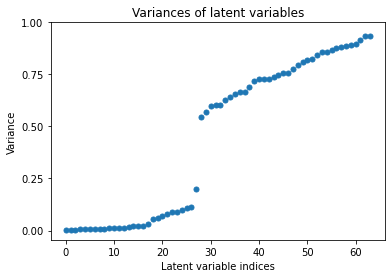

In [14]:
plt.plot(all_var[idx_sorted], '.',markersize=10)
plt.xlabel('Latent variable indices')
plt.ylabel('Variance')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.title('Variances of latent variables')

Text(0.5, 1.0, 'Reconstructed image')

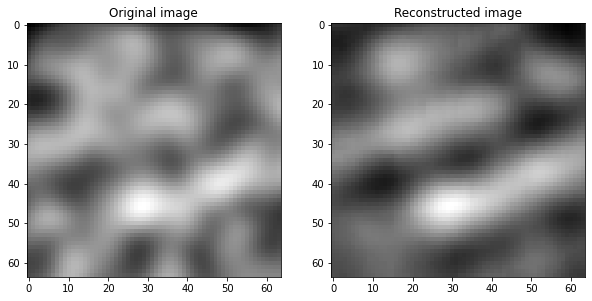

In [19]:
test_idx = 0 #Change this number to explore the training dataset
decoded_im = decoder.predict([np.expand_dims(z_mean_all[test_idx,:], axis=0)])
fig = plt.figure(figsize=(10,20))
fig.subplots_adjust(hspace=0)
ax = fig.subplots(1, 2)
ax[0].imshow(data[test_idx, :], cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(decoded_im[0, :, :, 0], cmap='gray')
ax[1].set_title('Reconstructed image')

In [ ]:
video_data = np.load('annealing_021622.npy') #This data file is available on Dryad

In [ ]:
plt.imshow(Gaussian_adjust(video_data[0,:,:]), cmap='gray')

In [ ]:
video_sub = video_data[:, 400:1040, 120:760]

In [ ]:
plt.imshow(Gaussian_adjust(video_sub[0,:,:]), cmap='gray')

In [ ]:
all_z = list() #These codes maybe slow to run
for i in range(73):
    for j in range(73):
        sub_center = [i*8+32, j*8+32]
        z_sub_video = list()
        for n in range(video_sub.shape[0]):
            z_mean,_,_ = loaded_encoder.predict(norm(rescale(video_sub[n,sub_center[0]-32:sub_center[0]+32,sub_center[1]-32:sub_center[1]+32]))[np.newaxis,:,:,np.newaxis])
            z_sub_video.append(z_mean)
        all_z.append(np.array(z_sub_video)[:,0,:])

In [ ]:
all_var = list()
all_s = list()
all_var_s = list()
for z_video in all_z:
    var_video = np.var(z_video, axis=0)
    s_score = list()
    for i in range(z_video.shape[1]):
        s_score.append(spearmanr(np.arange(0,z_video[:, i].shape[0]), z_video[:, i])[0])
    s_score = np.array(s_score)
    
    all_var.append(var_video[idx_sorted])
    all_s.append(s_score[idx_sorted])
    all_var_s.append(s_score[idx_sorted]*var_video[idx_sorted])

In [ ]:
for i in range(64):
    plt.figure()
    plt.title('z_'+str(i))
    plt.imshow((all_var_s[:,:,i])**2, vmin=-1, vmax=1)
    plt.xticks([])
    plt.yticks([])